HANDWRITTEN DIGIT RECOGNIZER USING CNN (MNISET DATASET)


INTRODUCTION

This project builds a Convolutional Neural Network (CNN) to recognize handwritten digits from the MNIST dataset. It shows how deep learning can be used for simple image classification tasks.
It has real-world applications such as:
* OCR in mobile applications
* Postal code recognition

In [9]:
#Step 1 : Import all the libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [10]:
#Step 2 : Load and Process the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN (batch, 28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


In [11]:
#Step 3 : Build Model

model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                ┃ Output Shape         ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)           │ (None, 26, 26, 32)   │         320 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ max_pooling2d_2             │ (None, 13, 13, 32)   │           0 │
│ (MaxPooling2D)              │                      │             │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ conv2d_3 (Conv2D)           │ (None, 11, 11, 64)   │      18,496 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ max_pooling2d_3             │ (None, 5, 5, 64)     │           0 │
│ (MaxPooling2D)              │                      │             │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ flatten_1 (Flatten)         │ (None, 1600)         │           0 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ dense_2 (Dense)             │ (None, 128)          │     204,928 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ dense_3 (Dense)             │ (None, 10)           │       1,290 │
└─────────────────────────────┴──────────────────────┴─────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Step 4 : Train the Model 

history = model.fit(
    x_train, y_train_cat,
    epochs=5,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 55s 31ms/step - accuracy: 0.9569 - loss: 0.1392 - val_accuracy: 0.9880 - val_loss: 0.0449
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 59s 35ms/step - accuracy: 0.9859 - loss: 0.0453 - val_accuracy: 0.9883 - val_loss: 0.0383
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 56s 33ms/step - accuracy: 0.9901 - loss: 0.0307 - val_accuracy: 0.9915 - val_loss: 0.0312
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 55s 32ms/step - accuracy: 0.9931 - loss: 0.0221 - val_accuracy: 0.9890 - val_loss: 0.0377
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 54s 32ms/step - accuracy: 0.9946 - loss: 0.0168 - val_accuracy: 0.9917 - val_loss: 0.0306


In [13]:
## Step 5: Evaluate on Test Data

test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


✅ Test Accuracy: 99.08%
Test Loss: 0.0269


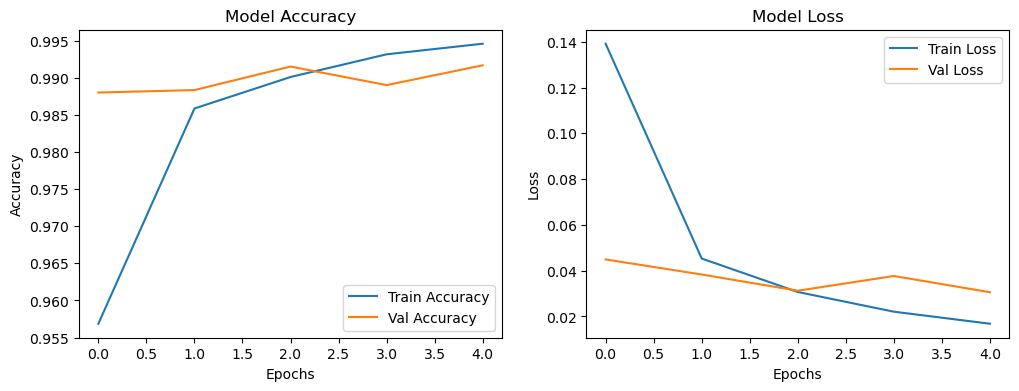

In [14]:
## Step 6: Visualization of Training

plt.figure(figsize=(12,4))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


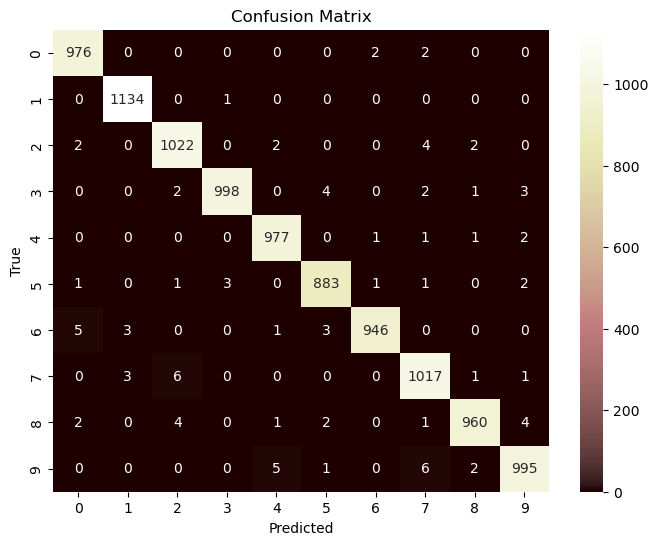


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [15]:
##  Step 7: Confusion Matrix & Classification Report

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="pink")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

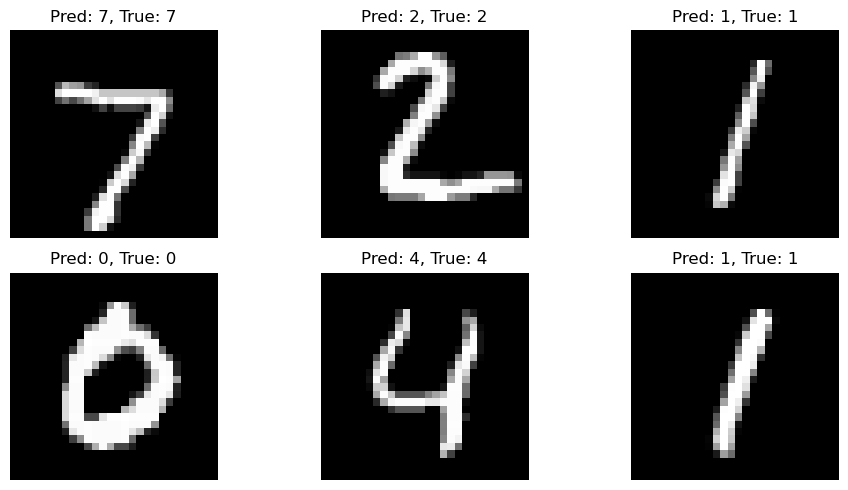

In [18]:
##  Step 8: Predict on Sample Images

plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap="grey")
    plt.title(f"Pred: {y_pred_classes[i]}, True: {y_test[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()